In [78]:
from IPython.core.display import HTML, display

import pymc3 as pm
import theano.tensor as tt
from theano import shared

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as pl
from matplotlib import rcParams
from seaborn import cubehelix_palette
from pymc_utils import PyMCModel

In [2]:
display(HTML("<style>.container {width: 90% !important}</style>"))

In [3]:
% matplotlib inline
rcParams['axes.titlesize'] = 18
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.labelsize'] = 16
rcParams['font.size'] = 16

In [79]:
cmap_uncertainty = cubehelix_palette(light=1, as_cmap=True)

In [44]:
def bayes_nn_model(X, y_obs, n_hidden, ylabel='y'):
    X = pm.floatX(X)
    Y = pm.floatX(y_obs)
    if hasattr(X, 'name'):
        num_obs, num_feats = X.eval().shape
    else:
        num_obs, num_feats = X.shape
    with pm.Model() as nn_3l:
        init_1 = np.random.randn(num_feats, n_hidden)
        #init_2 = np.random.randn(n_hidden, n_hidden)
        init_3 = np.random.randn(n_hidden,)
        w1 = pm.Normal('wts_layer1', mu=0, sd=1, shape=(num_feats, n_hidden), 
                      testval=init_1)
        #w2 = pm.Normal('wts_layer2', mu=0, sd=1, shape=(n_hidden, n_hidden),
        #               testval=init_2)
        w3 = pm.Normal('wts_layer3', mu=0, sd=1, shape=(n_hidden,),
                      testval=init_3)
        
        b1 = pm.Normal('bias_layer1', mu=0, sd=1, shape=(n_hidden,))
        #b2 = pm.Normal('bias_layer2', mu=0, sd=1, shape=(n_hidden,))
        b3 = pm.Normal('bias_layer3', mu=0, sd=1, shape=(1,))
        
        lyr1_out = pm.Deterministic('layer1_out', tt.nnet.relu(tt.dot(X, w1)) + b1)
        #lyr2_out = pm.Deterministic('layer2_out', tt.nnet.relu(tt.dot(lyr1_out, w2)) + b2)
        #lyr3_out = pm.Deterministic('layer3_out', tt.dot(lyr2_out, w3) + b3)
        lyr3_out = pm.Deterministic('layer3_out', tt.dot(lyr1_out, w3) + b3)
        
        sd = pm.HalfCauchy('sd', beta=2.5)
        output = pm.Normal('likelihood', mu=lyr3_out, sd=sd, observed=Y)
    return nn_3l

In [134]:
def bayes_nn_model2(X, y_obs, n_hidden, ylabel='y'):
    X = pm.floatX(X)
    Y = pm.floatX(y_obs)
    if hasattr(X, 'name'):
        num_obs, num_feats = X.eval().shape
    else:
        num_obs, num_feats = X.shape
    with pm.Model() as model:
        init_1 = np.random.randn(num_feats, n_hidden)
        init_2 = np.random.randn(n_hidden,)
        hyper_w1_sd = pm.HalfCauchy('hyper_w1_sd', beta=1)
        hyper_w2_sd = pm.HalfCauchy('hyper_w2_sd', beta=1)
        w1 = pm.Normal('wts_layer1', mu=0, sd=hyper_w1_sd, shape=(num_feats, n_hidden), 
                      testval=init_1)
        w2 = pm.Normal('wts_layer2', mu=0, sd=hyper_w2_sd, shape=(n_hidden,),
                      testval=init_2)
        
        b1 = pm.Normal('bias_layer1', mu=0, sd=1, shape=(n_hidden,))
        b2 = pm.Normal('bias_layer2', mu=0, sd=1, shape=(1,))
        
        lyr1_out = pm.Deterministic('layer1_out', tt.nnet.relu(tt.dot(X, w1)) + b1)
        lyr2_out = pm.Deterministic('layer2_out', tt.dot(lyr1_out, w2) + b2)
        
        sd = pm.HalfCauchy('sd', beta=2.5)
        output = pm.Normal('likelihood', mu=lyr2_out, sd=sd, observed=Y)
    return model

In [134]:
def bayes_nn_model2_2(X, y_obs, n_hidden, ylabel='y'):
    X = pm.floatX(X)
    Y = pm.floatX(y_obs)
    if hasattr(X, 'name'):
        num_obs, num_feats = X.eval().shape
    else:
        num_obs, num_feats = X.shape
    with pm.Model() as model:
        init_1 = np.random.randn(num_feats, n_hidden)
        init_2 = np.random.randn(n_hidden,)
        hyper_w1_sd = pm.HalfCauchy('hyper_w1_sd', beta=1)
        hyper_w2_sd = pm.HalfCauchy('hyper_w2_sd', beta=1)
        hyper_w2_mu = pm.Half
        w1 = pm.Normal('wts_layer1', mu=0, sd=hyper_w1_sd, shape=(num_feats, n_hidden), 
                      testval=init_1)
        w2 = pm.Normal('wts_layer2', mu=0, sd=hyper_w2_sd, shape=(n_hidden,),
                      testval=init_2)
        
        b1 = pm.Normal('bias_layer1', mu=0, sd=1, shape=(n_hidden,))
        b2 = pm.Normal('bias_layer2', mu=0, sd=1, shape=(1,))
        
        lyr1_out = pm.Deterministic('layer1_out', tt.nnet.relu(tt.dot(X, w1)) + b1)
        lyr2_out = pm.Deterministic('layer2_out', tt.dot(lyr1_out, w2) + b2)
        
        sd = pm.HalfCauchy('sd', beta=2.5)
        output = pm.Normal('likelihood', mu=lyr2_out, sd=sd, observed=Y)
    return model

In [110]:
def bayes_nn_model3(X, y_obs, n_hidden1, n_hidden2, ylabel='y'):
    X = pm.floatX(X)
    Y = pm.floatX(y_obs)
    if hasattr(X, 'name'):
        num_obs, num_feats = X.eval().shape
    else:
        num_obs, num_feats = X.shape
    with pm.Model() as model:
        init_1 = np.random.randn(num_feats, n_hidden1)
        init_2 = np.random.randn(n_hidden1, n_hidden2)
        init_3 = np.random.randn(n_hidden2,)
        hyper_w1 = pm.HalfCauchy('hyper_w1', beta=1)
        hyper_w2 = pm.HalfCauchy('hyper_w2', beta=1)
        hyper_w3 = pm.HalfCauchy('hyper_w3', beta=1)
        w1 = pm.Normal('wts_layer1', mu=0, sd=hyper_w1, shape=(num_feats, n_hidden1), 
                      testval=init_1)
        w2 = pm.Normal('wts_layer2', mu=0, sd=hyper_w2, shape=(n_hidden1, n_hidden2),
                       testval=init_2)
        w3 = pm.Normal('wts_layer3', mu=0, sd=hyper_w3, shape=(n_hidden2,),
                      testval=init_3)
        
        b1 = pm.Normal('bias_layer1', mu=0, sd=1, shape=(n_hidden1,))
        b2 = pm.Normal('bias_layer2', mu=0, sd=1, shape=(n_hidden2,))
        b3 = pm.Normal('bias_layer3', mu=0, sd=1, shape=(1,))
        
        lyr1_out = pm.Deterministic('layer1_out', tt.nnet.relu(tt.dot(X, w1)) + b1)
        lyr2_out = pm.Deterministic('layer2_out', tt.nnet.relu(tt.dot(lyr1_out, w2)) + b2)
        lyr3_out = pm.Deterministic('layer3_out', tt.dot(lyr2_out, w3) + b3)
        
        
        sd = pm.HalfCauchy('sd', beta=2.5)
        output = pm.Normal('likelihood', mu=lyr3_out, sd=sd, observed=Y)
    return model

In [24]:
ds = pd.read_pickle('./pickleJar/OperationalDataSets/df_rs_6_FullSet_noInteractions.pkl')

In [25]:
feat_beg = 'sin_doy'
feat_end_ni = 'PC6_s'
X_s = ds.dropna().loc[:, feat_beg: feat_end_ni]
lbls_X_s = X_s.columns.tolist()
y = ds.dropna().log10_chl
y_s = (y - y.mean()) / y.std()

In [31]:
X_s_train, X_s_test, y_train, y_test = train_test_split(X_s, y, test_size=0.1,
                                                       random_state=42)

In [32]:
X_shared = shared(X_s_train.values)

In [45]:
bayes_net = PyMCModel(bayes_nn_model, X_shared, y_train, n_hidden=16)

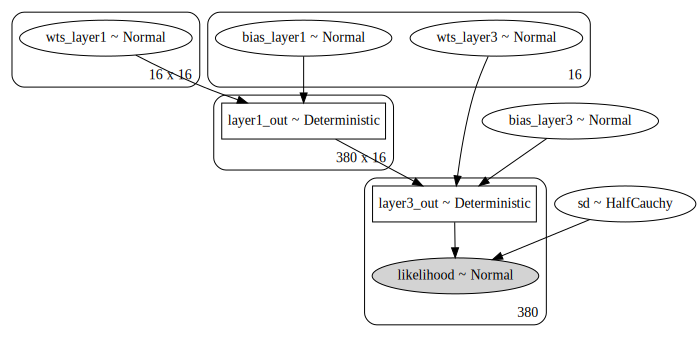

In [46]:
bayes_net.show_model()

In [47]:
bayes_net.fit_ADVI(n_iter=50000)

Average Loss = 157.56: 100%|██████████| 50000/50000 [00:29<00:00, 1721.89it/s]
Finished [100%]: Average Loss = 157.44


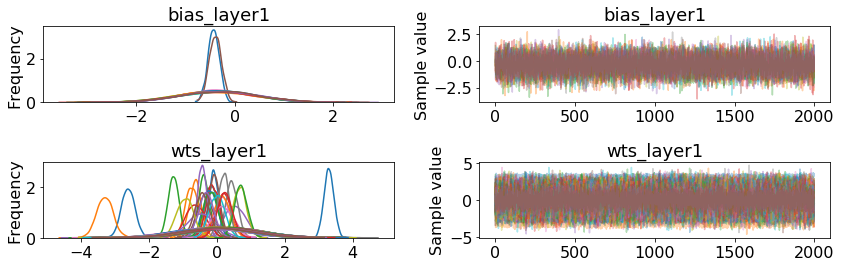

In [48]:
bayes_net.evaluate_fit(['bias_layer1', 'wts_layer1']);
#f = pl.gcf()
#f.savefig('./figJar/bayesNet/layer_1.png', dpi=300, format='png')

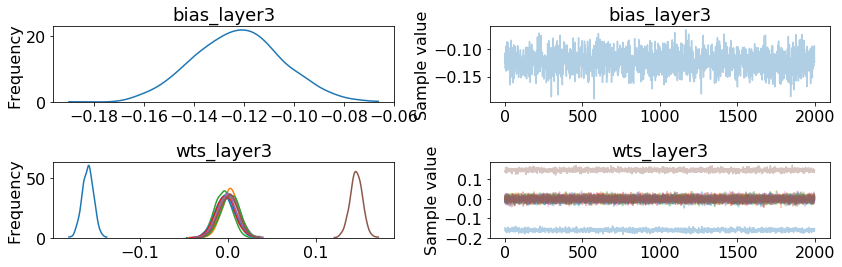

In [49]:
bayes_net.evaluate_fit(['bias_layer3', 'wts_layer3']);
#f = pl.gcf()
#f.savefig('./figJar/bayesNet/layer_3.png', dpi=300, format='png')

In [61]:
bayes_net.trace_.varnames

['wts_layer1',
 'wts_layer3',
 'bias_layer1',
 'bias_layer3',
 'sd_log__',
 'layer1_out',
 'layer3_out',
 'sd']

In [50]:
ppc = pm.sample_ppc(bayes_net.trace_, model=bayes_net.model)

100%|██████████| 2000/2000 [00:01<00:00, 1299.34it/s]


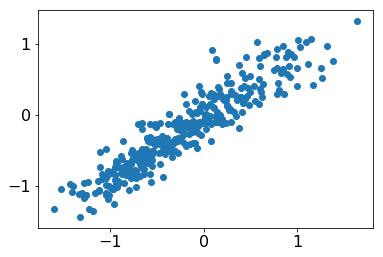

In [51]:
ax.scatter(y_train, ppc['likelihood'].mean(axis=0))

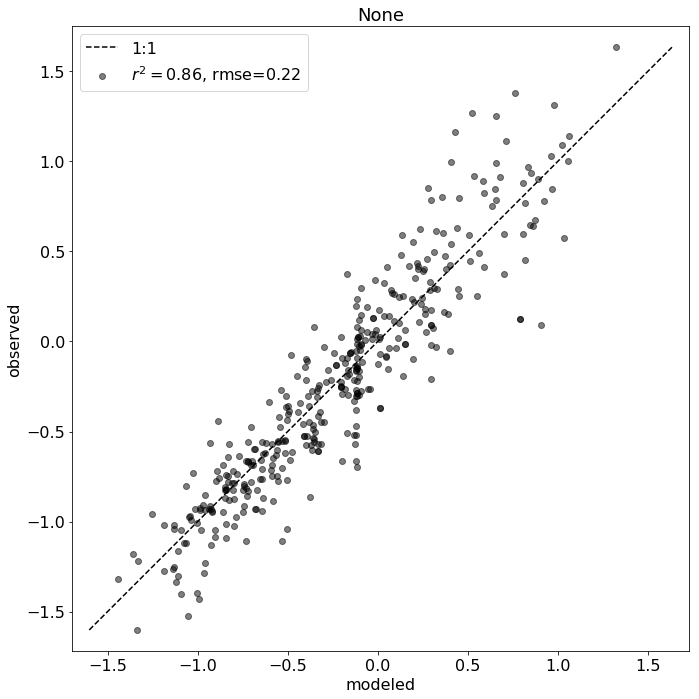

In [52]:
bayes_net.plot_model_fits(y_train, likelihood_var_name='layer3_out');

In [55]:
X_shared.set_value(X_s_test)
ppc_test = pm.sample_ppc(bayes_net.trace_, model=bayes_net.model)

100%|██████████| 2000/2000 [00:01<00:00, 1162.23it/s]


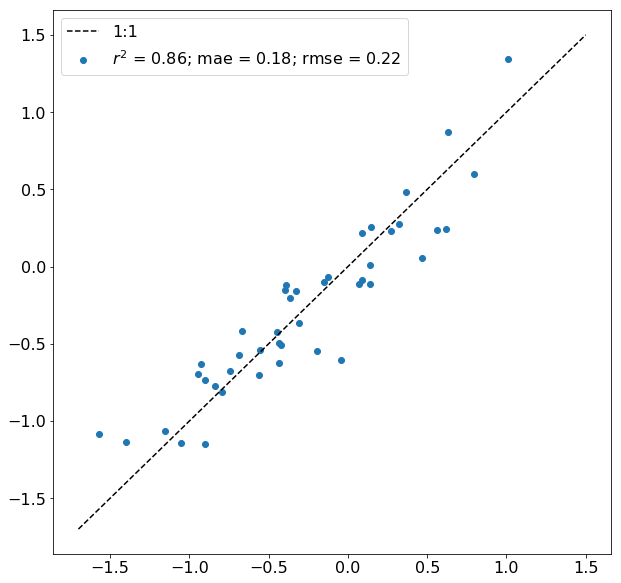

In [60]:
_, ax = pl.subplots(figsize=(10, 10))
lik_mean = ppc_test['likelihood'].mean(axis=0)
r2_ = r2_score(y_test, lik_mean)
mae = mean_absolute_error(y_test, lik_mean)
rmse = np.sqrt(mean_squared_error(y_test, lik_mean))
lbl = f'$r^2$ = {r2_:.2f}; mae = {mae:.2f}; rmse = {rmse:.2f}'
ax.scatter(y_test, ppc_test['likelihood'].mean(axis=0), label=lbl)
ax.plot([-1.7, 1.5], [-1.7, 1.5], ls='--', color='k', label='1:1')
ax.legend();

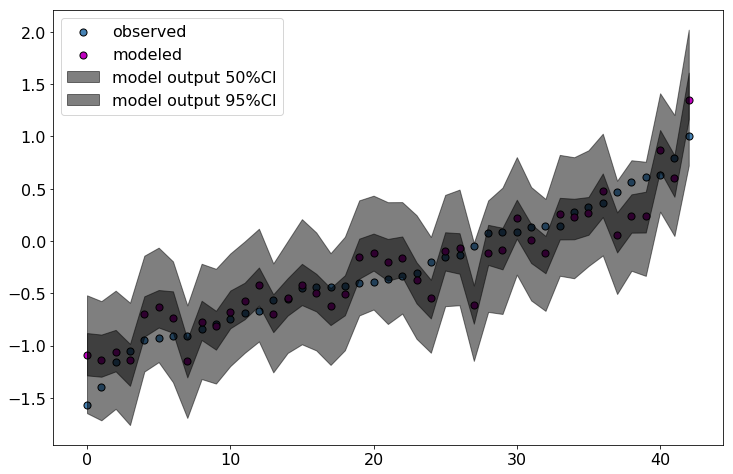

In [185]:
iy  = np.argsort(y_test)
ix = np.arange(iy.size)
lik_hpd = pm.hpd(ppc_test['likelihood'])
lik_hpd_05 = pm.hpd(ppc_test['likelihood'], alpha=0.5)

f_fit2, ax = pl.subplots(figsize=(12, 8))
ax.scatter(ix, y_test.values[iy], label='observed', edgecolor='k', s=50,
           color='steelblue');
ax.scatter(ix, lik_mean[iy], label='modeled', edgecolor='k', s=50, color='m')

ax.fill_between(ix, y1=lik_hpd_05[iy, 0], y2=lik_hpd_05[iy, 1], alpha=0.5, color='k',
               label='model output 50%CI');
ax.fill_between(ix, y1=lik_hpd[iy, 0], y2=lik_hpd[iy, 1], alpha=0.5, color='k',
               label='model output 95%CI');
ax.legend(loc='upper left');
f_fit2.savefig('./figJar/bayesNet/bayesNN_2Fits2.png', dpi=300, format='png')

### Hierarchical 1-layer

In [123]:
X_shared.set_value(X_s_train)

In [135]:
bayes_net2 = PyMCModel(bayes_nn_model2, X_shared, y_train, n_hidden=16)

In [136]:
bayes_net2.fit_ADVI()

Average Loss = 117.33: 100%|██████████| 100000/100000 [01:10<00:00, 1421.63it/s]
Finished [100%]: Average Loss = 117.42


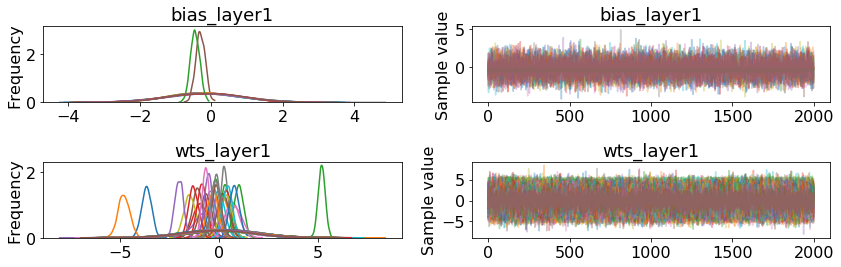

In [137]:
bayes_net2.evaluate_fit(['bias_layer1', 'wts_layer1']);
#f = pl.gcf()
#f.savefig('./figJar/bayesNet/layer_2.png', dpi=300, format='png')

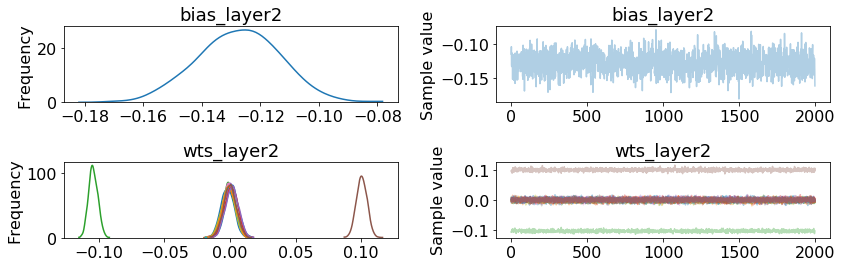

In [138]:
bayes_net2.evaluate_fit(['bias_layer2', 'wts_layer2']);
#f = pl.gcf()
#f.savefig('./figJar/bayesNet/layer_2.png', dpi=300, format='png')

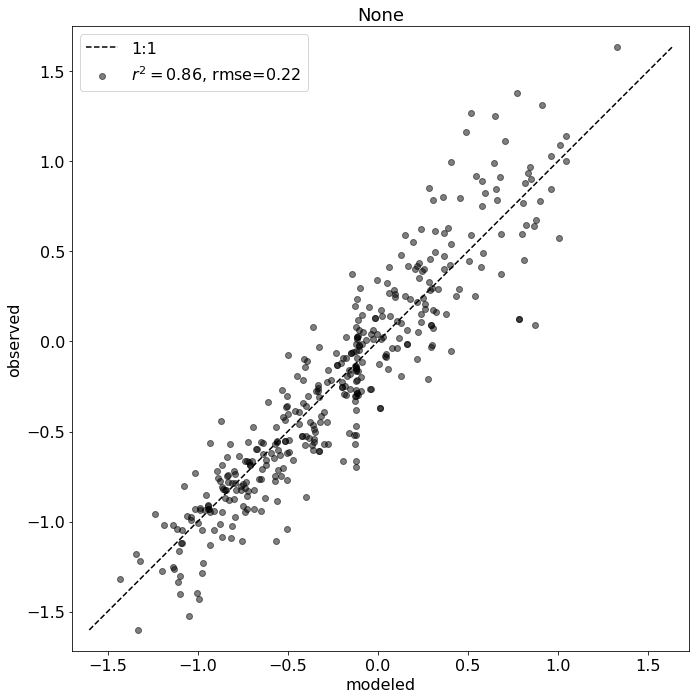

In [140]:
bayes_net2.plot_model_fits(y_train, likelihood_var_name='layer2_out');

In [141]:
X_shared.set_value(X_s_test)
ppc_lkl2 = pm.sample_ppc(bayes_net2.trace_, model=bayes_net2.model)['likelihood']

100%|██████████| 2000/2000 [00:01<00:00, 1096.51it/s]


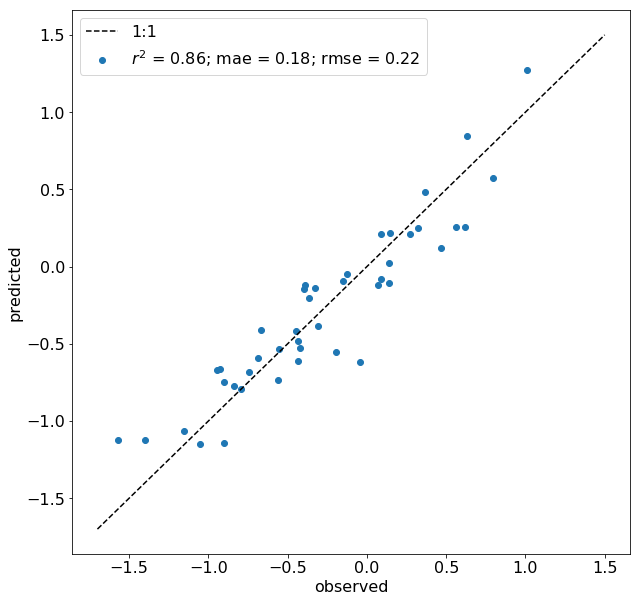

In [177]:
_, ax = pl.subplots(figsize=(10, 10))
lik_mean2 = ppc_lkl2.mean(axis=0)
r2_2 = r2_score(y_test, lik_mean2)
mae2 = mean_absolute_error(y_test, lik_mean2)
rmse2 = np.sqrt(mean_squared_error(y_test, lik_mean2))
lbl2 = f'$r^2$ = {r2_2:.2f}; mae = {mae2:.2f}; rmse = {rmse2:.2f}'
ax.scatter(y_test.values[iy], lik_mean2[iy], label=lbl2)
ax.plot([-1.7, 1.5], [-1.7, 1.5], ls='--', color='k', label='1:1')
ax.set_xlabel('observed')
ax.set_ylabel('predicted')
ax.legend();

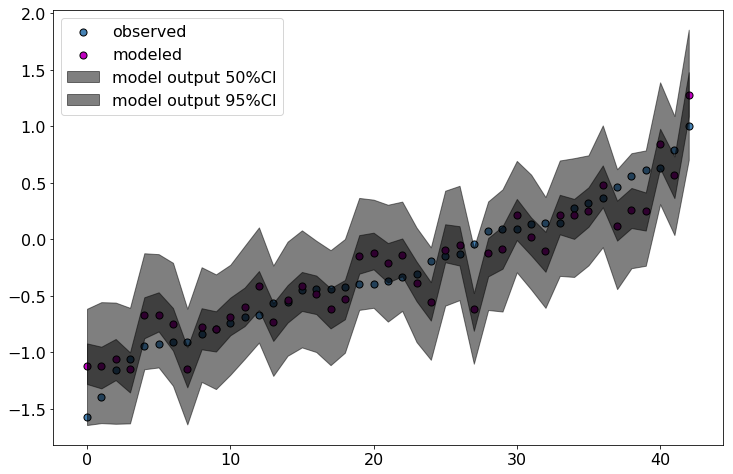

In [172]:
iy  = np.argsort(y_test)
ix = np.arange(iy.size)
lik_hpd2_005 = pm.hpd(ppc_lkl2)
lik_hpd2_05 = pm.hpd(ppc_lkl2, alpha=0.5)
f2_fit2, ax = pl.subplots(figsize=(12, 8))
ax.scatter(ix, y_test.values[iy], label='observed', edgecolor='k', s=50,
           color='steelblue');
ax.scatter(ix, lik_mean2[iy], label='modeled', edgecolor='k', s=50, color='m')
ax.fill_between(ix, y1=lik_hpd2_05[iy, 0], y2=lik_hpd2_05[iy, 1], alpha=0.5, color='k',
               label='model output 50%CI');
ax.fill_between(ix, y1=lik_hpd2_005[iy, 0], y2=lik_hpd2_005[iy, 1], alpha=0.5, color='k',
               label='model output 95%CI');
ax.legend(loc='upper left');

### Try a 3-layer model

In [178]:
X_shared.set_value(X_s_train)

In [179]:
bayes_net3 = PyMCModel(bayes_nn_model3, X_shared, y_train,
                       model_name='L3_1', n_hidden1=16, n_hidden2=16)

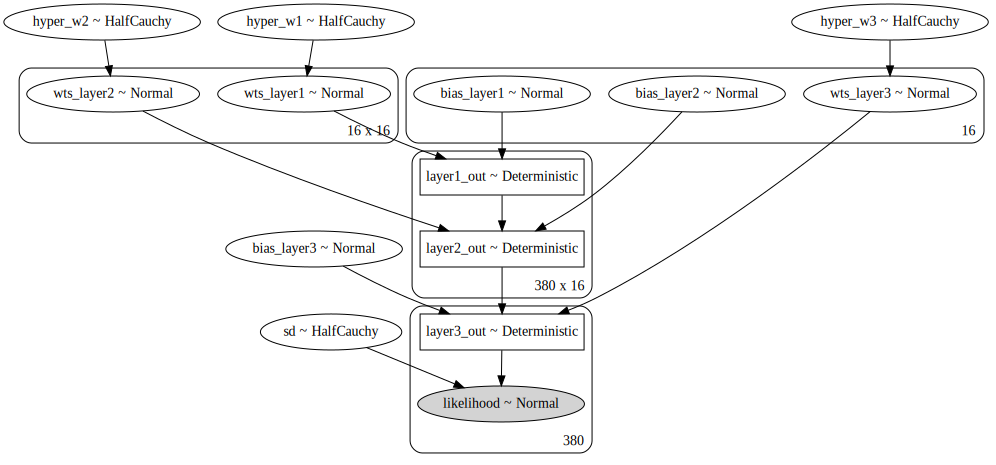

In [180]:
bayes_net3.show_model()

In [181]:
bayes_net3.fit_ADVI()

Average Loss = 385.88: 100%|██████████| 100000/100000 [01:25<00:00, 1173.03it/s] 
Finished [100%]: Average Loss = 385.92


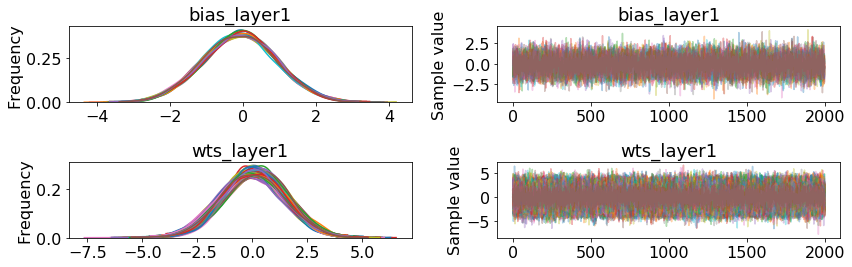

In [182]:
bayes_net3.evaluate_fit(['bias_layer1', 'wts_layer1']);
#f = pl.gcf()
#f.savefig('./figJar/bayesNet/layer_2.png', dpi=300, format='png')

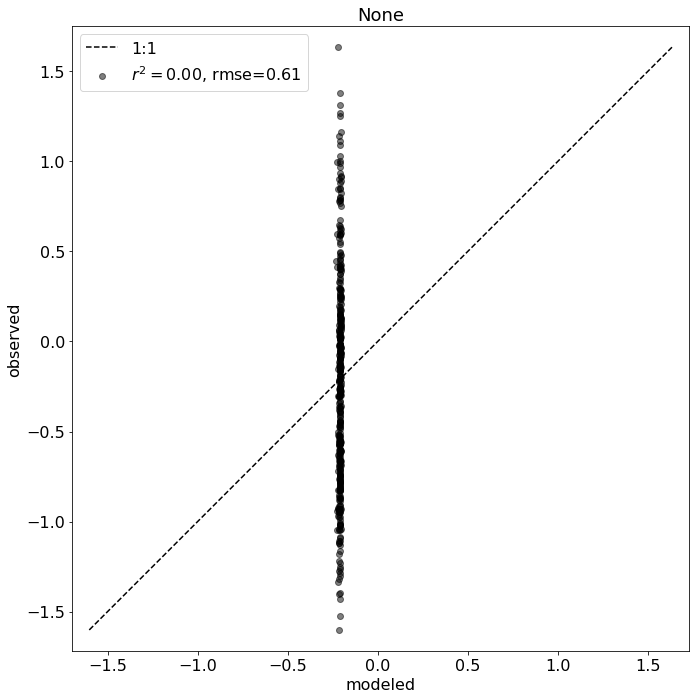

In [183]:
bayes_net3.plot_model_fits(y_train, likelihood_var_name='layer3_out');